In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from google.colab import drive
!pip install polyglot
!pip install pyicu
!pip install xlrd
!pip install pycld2
!pip install langdetect

drive.mount('/content/drive')

path = "/content/drive/MyDrive/Spring_Research_Data/perfumes_table.csv"
df = pd.read_csv(path)



  Using cached pyicu-2.15.2.tar.gz (267 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyicu: filename=pyicu-2.15.2-cp311-cp311-linux_x86_64.whl size=2691076 sha256=5c01fa87ae37ff7b5bb29f98ea7add386ec8d7a81124bc204f288fdb8b632c1e
  Stored in directory: /root/.cache/pip/wheels/d6/8f/fc/8184fe368e89ab76c136ba372b0127dd64c10830991f9301ab
Successfully built pyicu
  Using cached langdetect-1.0.9-py3-none-any.whl
Mounted at /content/drive


In [ ]:
import math
from polyglot.detect import Detector
import warnings
import logging
from langdetect import detect
logging.getLogger('polyglot.detect.base').setLevel(logging.ERROR)
descriptions = []
ratings = []

for i in range(len(df)):
  rating = df.at[i, 'rating']
  description = str(df.at[i, 'description'])



  if detect(description) != 'en':
    continue

  if not np.isnan(rating):
    tempRating = round(rating, 1) #Round up instead of truncating
    if tempRating >= 0.0 and tempRating < 3.4:
      ratings.append(1) #1 being low
    elif tempRating >= 3.4 and tempRating < 4.2:
      ratings.append(2)#2 being medium
    else:
      ratings.append(3) #3 being high
    descriptions.append(description)
print(len(ratings), len(descriptions))
test = pd.DataFrame(ratings)
print(test.head())


2458 2458
   0
0  3
1  3
2  2
3  2
4  3


In [ ]:
ratings = np.array(ratings)
correlation = {}
correlation["description"] = descriptions
correlation["rating"] = ratings
correlation = pd.DataFrame(correlation)

In [ ]:
value_to_count = 2
count = np.count_nonzero(ratings == value_to_count)
print(f"Element {value_to_count}: {count} occurrences")
print(len(ratings))
print(count/len(ratings))

Element 2: 1430 occurrences
2458
0.5817737998372661


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import seaborn as sns

Accuracy: 57.93%

              precision    recall  f1-score   support

           1       0.10      0.04      0.06        45
           2       0.64      0.78      0.70       282
           3       0.50      0.38      0.43       165

    accuracy                           0.58       492
   macro avg       0.41      0.40      0.40       492
weighted avg       0.54      0.58      0.55       492

[[  2  31  12]
 [ 10 221  51]
 [  8  95  62]]


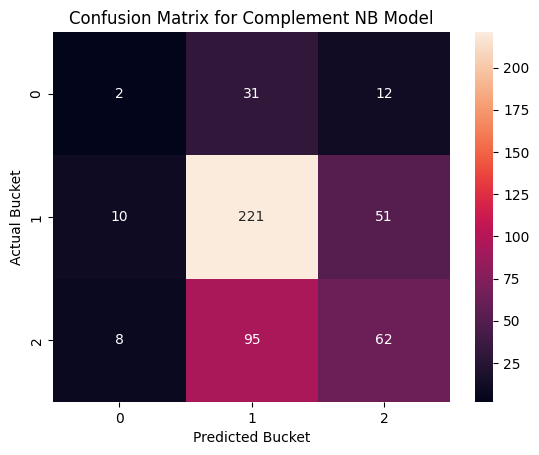

In [ ]:
X = correlation['description']
X = X.astype(str)
# X = X.toarray()
y = correlation['rating']
y=y.astype('int')
# y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

from sklearn.naive_bayes import ComplementNB
model = ComplementNB()


model.fit(X_train_vectors, y_train)

y_pred = model.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted Bucket')
plt.ylabel('Actual Bucket')
plt.title('Confusion Matrix for Complement NB Model')

plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")


Accuracy: 60.37%

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        45
           2       0.63      0.86      0.72       282
           3       0.52      0.33      0.41       165

    accuracy                           0.60       492
   macro avg       0.38      0.40      0.38       492
weighted avg       0.53      0.60      0.55       492

[[  0  34  11]
 [  0 242  40]
 [  0 110  55]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


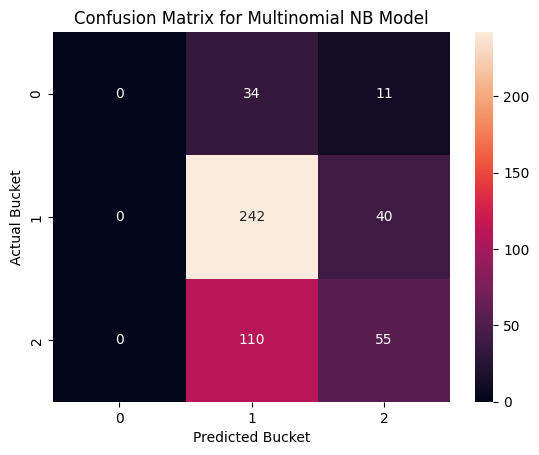

In [ ]:
model = MultinomialNB()

model.fit(X_train_vectors, y_train)

y_pred = model.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted Bucket')
plt.ylabel('Actual Bucket')
plt.title('Confusion Matrix for Multinomial NB Model')

plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 57.93%

              precision    recall  f1-score   support

           1       0.11      0.02      0.04        45
           2       0.64      0.76      0.69       282
           3       0.47      0.42      0.44       165

    accuracy                           0.58       492
   macro avg       0.41      0.40      0.39       492
weighted avg       0.53      0.58      0.55       492

[[  1  27  17]
 [  7 215  60]
 [  1  95  69]]


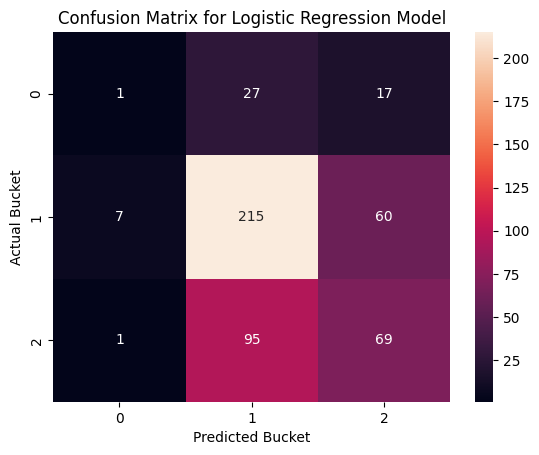

In [ ]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train_vectors, y_train)

y_pred = model.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted Bucket')
plt.ylabel('Actual Bucket')
plt.title('Confusion Matrix for Logistic Regression Model')

plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")